In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from google.colab import files 
uploaded= files.upload () 

Saving Concrete_Data_1.xlsx to Concrete_Data_1.xlsx


In [3]:
data=pd.read_excel("Concrete_Data_1.xlsx")
data

,Mezcla_Cemento,Escoria_Alto_Horno,Ceniza_Volante,Agua,Superplastificante,Coarse Aggregate,Agregado_Grueso,Agregado_Fino,Resistencia_Compresion_Hoirmigon
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# Data

Se pretende pronosticar la resistencia a la compresión del hormigón en base de a las siguientes características físico químicas:

*   Mezcla de Cemento
*   Escoria de alto horno
*   Cenizas volantes
*   Agua
*   Superplastificante
*   Agregado grueso 
*   Agregado fino


In [4]:
data.describe()

,Mezcla_Cemento,Escoria_Alto_Horno,Ceniza_Volante,Agua,Superplastificante,Coarse Aggregate,Agregado_Grueso,Agregado_Fino,Resistencia_Compresion_Hoirmigon
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


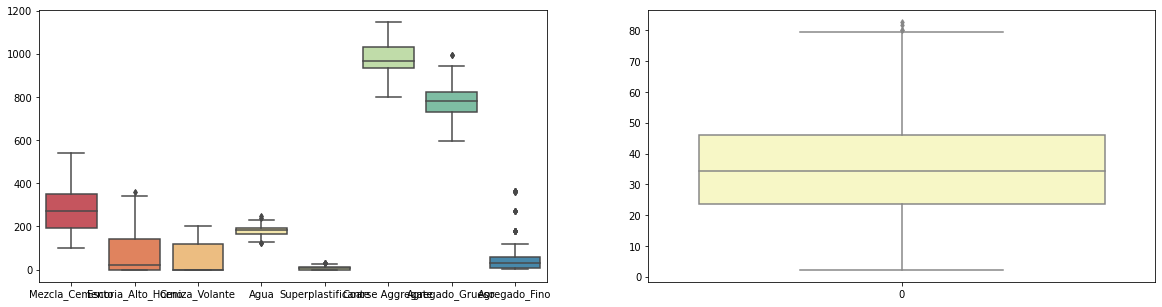

In [6]:
plt.figure(figsize=(20,5))  #OBSERVAMOSLOS ATIPICOS QUE ELIMINAMOS
plt.subplot(121)
sb.boxplot(data=data[data.columns[:-1]],fliersize=4,palette="Spectral")
plt.subplot(122)
sb.boxplot(data=data["Resistencia_Compresion_Hoirmigon"],fliersize=4,palette="Spectral")
plt.show()

In [7]:
# Fill empty and NaNs values with NaN  DETERMINAMOS SI HAY NAN
data=data.fillna(np.nan)
# Check for Null values
data.isnull().sum()

Mezcla_Cemento                      0
Escoria_Alto_Horno                  0
Ceniza_Volante                      0
Agua                                0
Superplastificante                  0
Coarse Aggregate                    0
Agregado_Grueso                     0
Agregado_Fino                       0
Resistencia_Compresion_Hoirmigon    0
dtype: int64

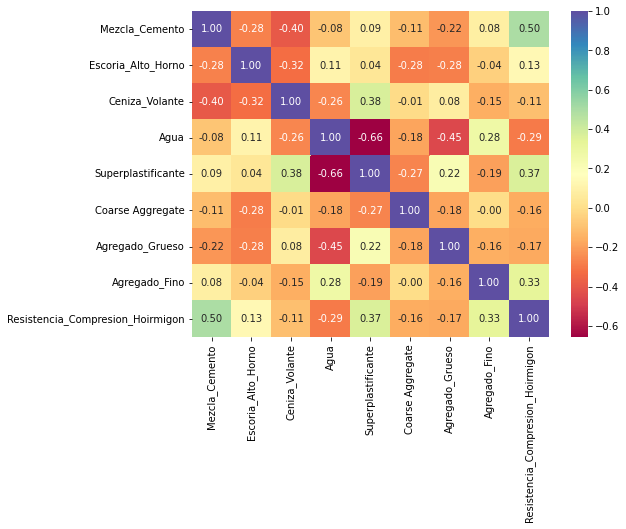

In [8]:
# Correlation matrix between numerical values MATRIZ DE CORRELACIÓN
plt.figure(figsize=(8,6))
g = sb.heatmap(data.corr(),annot=True, fmt = ".2f", cmap = "Spectral")
plt.show()

<Figure size 360x216 with 0 Axes>

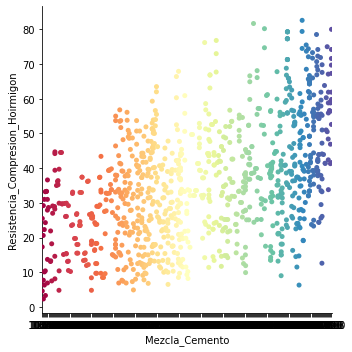

In [11]:
plt.figure(figsize=(5,3))
g = sb.catplot(x="Mezcla_Cemento",y="Resistencia_Compresion_Hoirmigon",data=data.round(1),kind="strip",height=5,aspect=1,palette="Spectral")
plt.show()

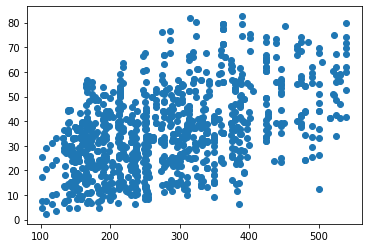

In [12]:
plt.scatter(data["Mezcla_Cemento"],data["Resistencia_Compresion_Hoirmigon"]) #QUIERE DECIR LOS MISMO QUE EL GRAFICOANTERIOR
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [97]:
X1=data.drop(columns="Resistencia_Compresion_Hoirmigon") #TODAS MLAS COLUMNAS MENOS RINGS
y1=data["Resistencia_Compresion_Hoirmigon"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=1432) # SE PARTEN LOS DATOSEN 3 PARTES 1 PARTE PARA MODELAR Y OTRAPARA PRONOSTICAR O ENTRENAR

In [63]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, HistGradientBoostingClassifier 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor 
from sklearn.ensemble import VotingClassifier, StackingClassifier, StackingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error
import sklearn
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5)

In [17]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


# Iniciamos con Modelos de Regresión

Como la variable de desición para el modelo de regresión es continua no se tiene en cuenta el modelo Logístico

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


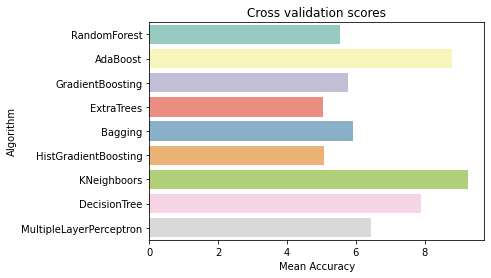

In [98]:
# Modeling step Test differents algorithms 
random_state = None
classifiers = []
classifiers.append(RandomForestRegressor(random_state=random_state))
classifiers.append(AdaBoostRegressor(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingRegressor(random_state=random_state))
classifiers.append(ExtraTreesRegressor(random_state=random_state))
classifiers.append(BaggingRegressor(random_state=random_state))
classifiers.append(HistGradientBoostingRegressor(random_state=random_state))
#classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsRegressor())
classifiers.append(DecisionTreeRegressor(random_state=random_state))
classifiers.append(MLPRegressor(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_validate(classifier,X1_train,y1_train,cv=7,scoring="r2",n_jobs=-1))
    classifier.fit(X1_train,y1_train)
    y1_pred=classifier.predict(X1_test)
    cv_results2.append(np.sqrt(mean_squared_error(y1_pred,y1_test)))
    cv_results.append(cv_results)

cv_res = pd.DataFrame({"RMSE":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
#cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("RMSE","Algorithm",data=cv_res,palette="Set3",orient="h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [99]:
#Se escogen los modelos de arriba que mayor sean representativos para combinarlos, en este caso KNeighbors,DecisionTree, AdaBoost y 
KNR = KNeighborsRegressor()
KNR.fit(X1_train,y1_train)

DCSR = DecisionTreeRegressor()
DCSR.fit(X1_train,y1_train)

AdaR = AdaBoostRegressor()
AdaR.fit(X1_train,y1_train)

MLPR = MLPRegressor()
MLPR.fit(X1_train,y1_train)
 
pred_KNR=KNR.predict(X1_test)
pred_DCSR=DCSR.predict(X1_test)
pred_AdaR=AdaR.predict(X1_test)
pred_MLPR=MLPR.predict(X1_test)

In [100]:
for i,j in zip([pred_KNR,pred_DCSR,pred_AdaR,pred_MLPR],["KNR","DCSR","AdaR","MLPR"]):
    print("RMSE for ",j,"is ",np.sqrt(mean_squared_error(i,y1_test)))

RMSE for  KNR is  9.265572453037173
RMSE for  DCSR is  7.815441965452797
RMSE for  AdaR is  7.935791423442707
RMSE for  MLPR is  7.42178339692601


# Ensamble Por Voting

In [101]:
#voting : {'hard', 'soft'}
votingR = VotingRegressor(estimators=[('kNR', KNR),('DCSR', DCSR),('AdaR',AdaR),('MLPR',MLPR)], n_jobs=4)
votingR = votingR.fit(X1_train, y1_train)
Resistencia_predicted_All_Voting = votingR.predict(X1_test)

In [103]:
print("RMSE for Voting is ",np.sqrt(mean_squared_error(Resistencia_predicted_All_Voting,y1_test)))

RMSE for Voting is  6.048158375902211


# Ensamble por Steking

In [105]:
#stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
stackingR = StackingRegressor(estimators=[('kNR', KNR),('DCSR', DCSR),('AdaR',AdaR),('MLPR',MLPR)], n_jobs=4)
stackingR = stackingR.fit(X1_train, y1_train)
Resistencia_predicted_All_Stacking = stackingR.predict(X1_test)

In [106]:
print("RMSE for Stacking is ",np.sqrt(mean_squared_error(Resistencia_predicted_All_Stacking,y1_test)))

RMSE for Stacking is  6.51439970876548


In [107]:
def rmse(dat):
    return np.sqrt(mean_squared_error(dat,y1_test))
resultados_1=pd.DataFrame()
resultados_1["Modelo"]=["KNR","DCSR","AdaR","MLPR","Voting","Stacking"]
resultados_1["RMSE"]=[rmse(pred_KNR),rmse(pred_DCSR),rmse(pred_AdaR),rmse(pred_MLPR),rmse(Resistencia_predicted_All_Voting),rmse(Resistencia_predicted_All_Stacking)]

In [108]:
resultados_1.T

,0,1,2,3,4,5
Modelo,KNR,DCSR,AdaR,MLPR,Voting,Stacking
RMSE,9.265572,7.815442,7.935791,7.421783,6.048158,6.5144


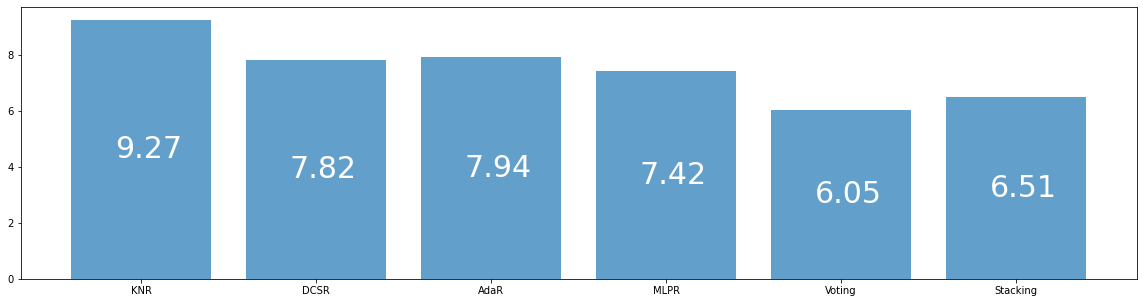

In [109]:
plt.figure(figsize=(20,5))
plt.bar(resultados_1["Modelo"],resultados_1["RMSE"],alpha=0.7)
for i,j in enumerate(resultados_1["RMSE"]):
    plt.text(i-0.15,j/2,np.round(j,2),ma="center",va="center",fontsize=30,c="w")
plt.xticks(np.arange(0,6,1),resultados_1["Modelo"])

plt.show()

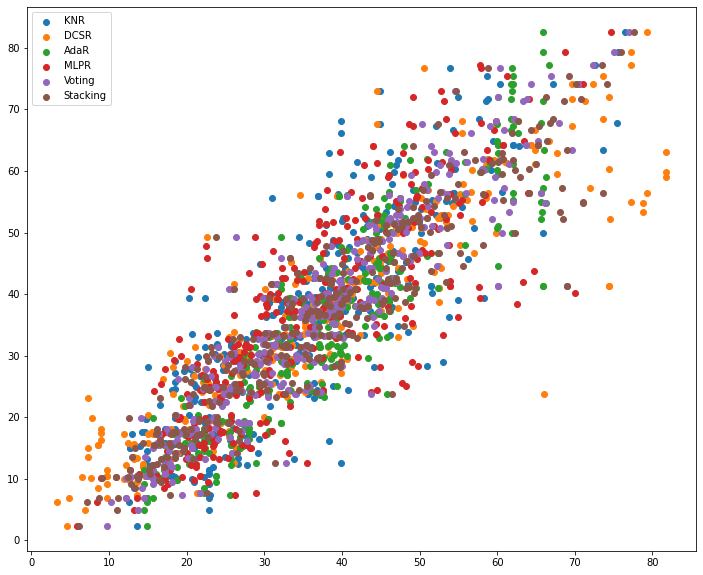

In [43]:
plt.figure(figsize=(12,10))
for i,j in zip([pred_KNR,pred_DCSR,pred_AdaR,pred_MLPR,Resistencia_predicted_All_Voting,Resistencia_predicted_All_Stacking],["KNR","DCSR","AdaR","MLPR","Voting","Stacking"]):
    plt.scatter(i,y_test, label=j)
    plt.legend()
plt.show()

# Modelo de Clasificación

Para poder encontrar un modelo de clasificación para estos datos categorizamos la varaible de respuesta y la ubicamos en varios intervalos o clases quedando así: 

*   Clase 1: de 0 a 10 MPa
*   Clase 2: de 10,1 a 20 MPa
*   Clase 3: de 20,1 a 30 MPa
*   Clase 4: de 30,1 a 40 MPa
*   Clase 5: de 40,1 a 50 MPa
*   Clase 6: de 50,1 a 60 MPa
*   Clase 7: de 60,1 a 70 MPa
*   Clase 8: de 70,1 a 80 MPa
*   Clase 9: Más de 80 Mpa

In [76]:
data1=data.copy()

In [77]:
#Categorizando
filtro=(data1["Resistencia_Compresion_Hoirmigon"]>=0)&(data1["Resistencia_Compresion_Hoirmigon"]<=10)
data1.loc[filtro,"Clase"]=1
filtro=(data1["Resistencia_Compresion_Hoirmigon"]>10)&(data1["Resistencia_Compresion_Hoirmigon"]<=20)
data1.loc[filtro,"Clase"]=2
filtro=(data1["Resistencia_Compresion_Hoirmigon"]>20)&(data1["Resistencia_Compresion_Hoirmigon"]<=30)
data1.loc[filtro,"Clase"]=3
filtro=(data1["Resistencia_Compresion_Hoirmigon"]>30)&(data1["Resistencia_Compresion_Hoirmigon"]<=40)
data1.loc[filtro,"Clase"]=4
filtro=(data1["Resistencia_Compresion_Hoirmigon"]>40)&(data1["Resistencia_Compresion_Hoirmigon"]<=50)
data1.loc[filtro,"Clase"]=5
filtro=(data1["Resistencia_Compresion_Hoirmigon"]>50)&(data1["Resistencia_Compresion_Hoirmigon"]<=60)
data1.loc[filtro,"Clase"]=6
filtro=(data1["Resistencia_Compresion_Hoirmigon"]>60)&(data1["Resistencia_Compresion_Hoirmigon"]<=70)
data1.loc[filtro,"Clase"]=7
filtro=(data1["Resistencia_Compresion_Hoirmigon"]>70)&(data1["Resistencia_Compresion_Hoirmigon"]<=80)
data1.loc[filtro,"Clase"]=8
filtro=(data1["Resistencia_Compresion_Hoirmigon"]>80)
data1.loc[filtro,"Clase"]=9
data1

,Mezcla_Cemento,Escoria_Alto_Horno,Ceniza_Volante,Agua,Superplastificante,Coarse Aggregate,Agregado_Grueso,Agregado_Fino,Resistencia_Compresion_Hoirmigon,Clase
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,8.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,7.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,5.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,5.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,5.0
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354,5.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794,4.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601,3.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036,4.0


In [78]:
data1=data1.drop("Resistencia_Compresion_Hoirmigon",axis=1)

In [79]:
X=data1.drop(columns="Clase")
y=data1["Clase"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1432)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selecti

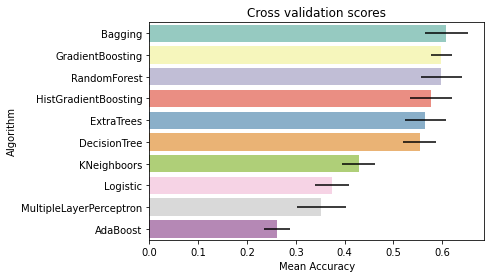

In [80]:
# Modeling step Test differents algorithms 
random_state = None
classifiers = []
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(BaggingClassifier(random_state=random_state))
classifiers.append(HistGradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))

cv_results, cv_results2 = [], []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,X_train,y=y_train,scoring="accuracy",cv=kfold,n_jobs=4))
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    cv_results2.append(accuracy_score(y_pred,y_test))

cv_means = []
cv_std = []
cv_acc = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Accuracy":cv_results2,
                       "Algorithm":["RandomForest","AdaBoost","GradientBoosting","ExtraTrees","Bagging","HistGradientBoosting",
                                    "Logistic","KNeighboors","DecisionTree","MultipleLayerPerceptron"]})
cv_res=cv_res.sort_values(by="CrossValMeans",ascending=False)
g = sb.barplot("CrossValMeans","Algorithm",data=cv_res,palette="Set3",orient="h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [81]:
cv_res

,CrossValMeans,CrossValerrors,Accuracy,Algorithm
4,0.608696,0.041753,0.602941,Bagging
2,0.598551,0.041652,0.600000,GradientBoosting
0,0.598551,0.044811,0.632353,RandomForest
5,0.576812,0.033865,0.597059,HistGradientBoosting
3,0.565217,0.043719,0.558824,ExtraTrees
8,0.553623,0.049911,0.576471,DecisionTree
7,0.428986,0.034418,0.379412,KNeighboors
6,0.373913,0.033865,0.402941,Logistic
9,0.352174,0.026958,0.379412,MultipleLayerPerceptron
1,0.260870,0.021979,0.258824,AdaBoost


In [83]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

HGC = HistGradientBoostingClassifier()
HGC.fit(X_train,y_train)

GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)

BGC = BaggingClassifier()
BGC.fit(X_train,y_train)

pred_RFC=RFC.predict(X_test)
pred_HGC=HGC.predict(X_test)
pred_GBC=GBC.predict(X_test)
pred_BGC=BGC.predict(X_test)

In [84]:
for i,j in zip([pred_RFC,pred_HGC,pred_GBC,pred_BGC],["RFC","HGC","GBC","BGC"]):
    print("RMSE for ",j,"is ",np.sqrt(mean_squared_error(i,y_test)))

RMSE for  RFC is  0.7553729114113886
RMSE for  HGC is  0.7726958156541368
RMSE for  GBC is  0.8960698502184906
RMSE for  BGC is  0.7316379689758171


# Voting

In [85]:
#voting : {'hard', 'soft'}
votingC = VotingClassifier(estimators=[('RFC', RFC),('HGC', HGC),('GBC',GBC),('BGC',BGC)], voting='soft', n_jobs=4)
votingC = votingC.fit(X_train, y_train)
Clase_predicted_All_Voting = votingC.predict(X_test)

In [86]:
print("RMSE for Voting is ",np.sqrt(mean_squared_error(Clase_predicted_All_Voting,y_test)))

RMSE for Voting is  0.7650451735989574


# Stacking

In [89]:
#stack_method : {'auto', 'predict_proba', 'decision_function', 'predict'}
stackingC = StackingClassifier(estimators=[('RFC', RFC),('HGC', HGC),('GBC',GBC),('BGC',BGC)], stack_method='auto', n_jobs=4)
stackingC = stackingC.fit(X_train, y_train)
Clase_predicted_All_Stacking = stackingC.predict(X_test)

In [90]:
print("RMSE for Stacking is ",np.sqrt(mean_squared_error(Clase_predicted_All_Stacking,y_test)))

RMSE for Stacking is  0.6773651374345779


In [91]:
def rmse(dat):
    return np.sqrt(mean_squared_error(dat,y_test))
resultados=pd.DataFrame()
resultados["Modelo"]=["RFC","HGC","GBC","BGC","Voting","Stacking"]
resultados["RMSE"]=[rmse(pred_RFC),rmse(pred_HGC),rmse(pred_GBC),rmse(pred_BGC),rmse(Clase_predicted_All_Voting),rmse(Clase_predicted_All_Stacking)]

In [92]:
resultados.T

,0,1,2,3,4,5
Modelo,RFC,HGC,GBC,BGC,Voting,Stacking
RMSE,0.755373,0.772696,0.89607,0.731638,0.765045,0.677365


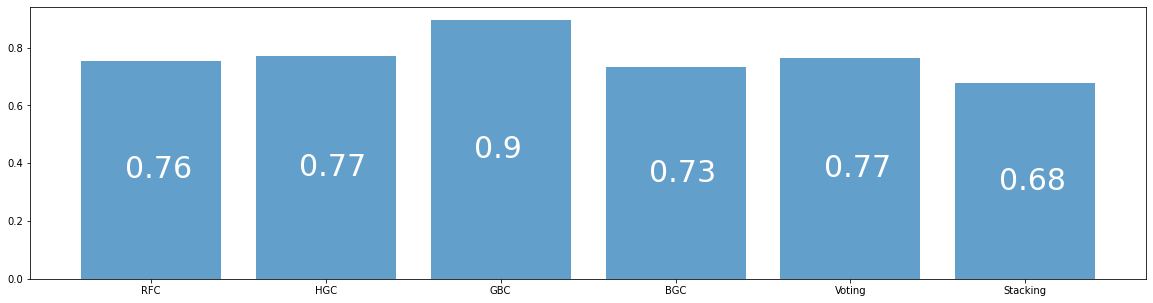

In [93]:
plt.figure(figsize=(20,5))
plt.bar(resultados["Modelo"],resultados["RMSE"],alpha=0.7)
for i,j in enumerate(resultados["RMSE"]):
    plt.text(i-0.15,j/2,np.round(j,2),ma="center",va="center",fontsize=30,c="w")
plt.xticks(np.arange(0,6,1),resultados["Modelo"])

plt.show()

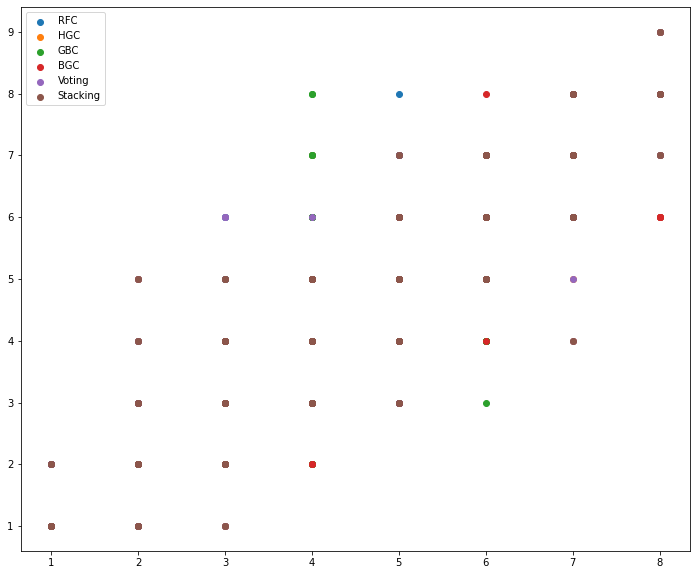

In [94]:
plt.figure(figsize=(12,10))
for i,j in zip([pred_RFC,pred_HGC,pred_GBC,pred_BGC,Clase_predicted_All_Voting,Clase_predicted_All_Stacking],["RFC","HGC","GBC","BGC","Voting","Stacking"]):
    plt.scatter(i,y_test, label=j)
    plt.legend()
plt.show()

# CONCLUSIÓN

Al pronosticar la resistencia a la compresión del Hormigón (continuo) en un valor definido en MPa y en un Intervalo (Categórico) en base a varias cantidades físico químicas, nos damos cuenta que en modelo de regresión el método de ensamble que menor RMSE arroja es Voting mientras que al  categorizar los datos todos los modelos de clasificación obviamente son mejores que los de regresión, y el mejor método de ensamble es Staking.